## **Artificial Neural Networks**

### Data Exploration and Preprocessing

In [150]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [151]:
df = pd.read_csv('Alphabets_data.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [152]:
df.shape

(20000, 17)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


There are no null values.

In [154]:
data = df.iloc[:, 1:]

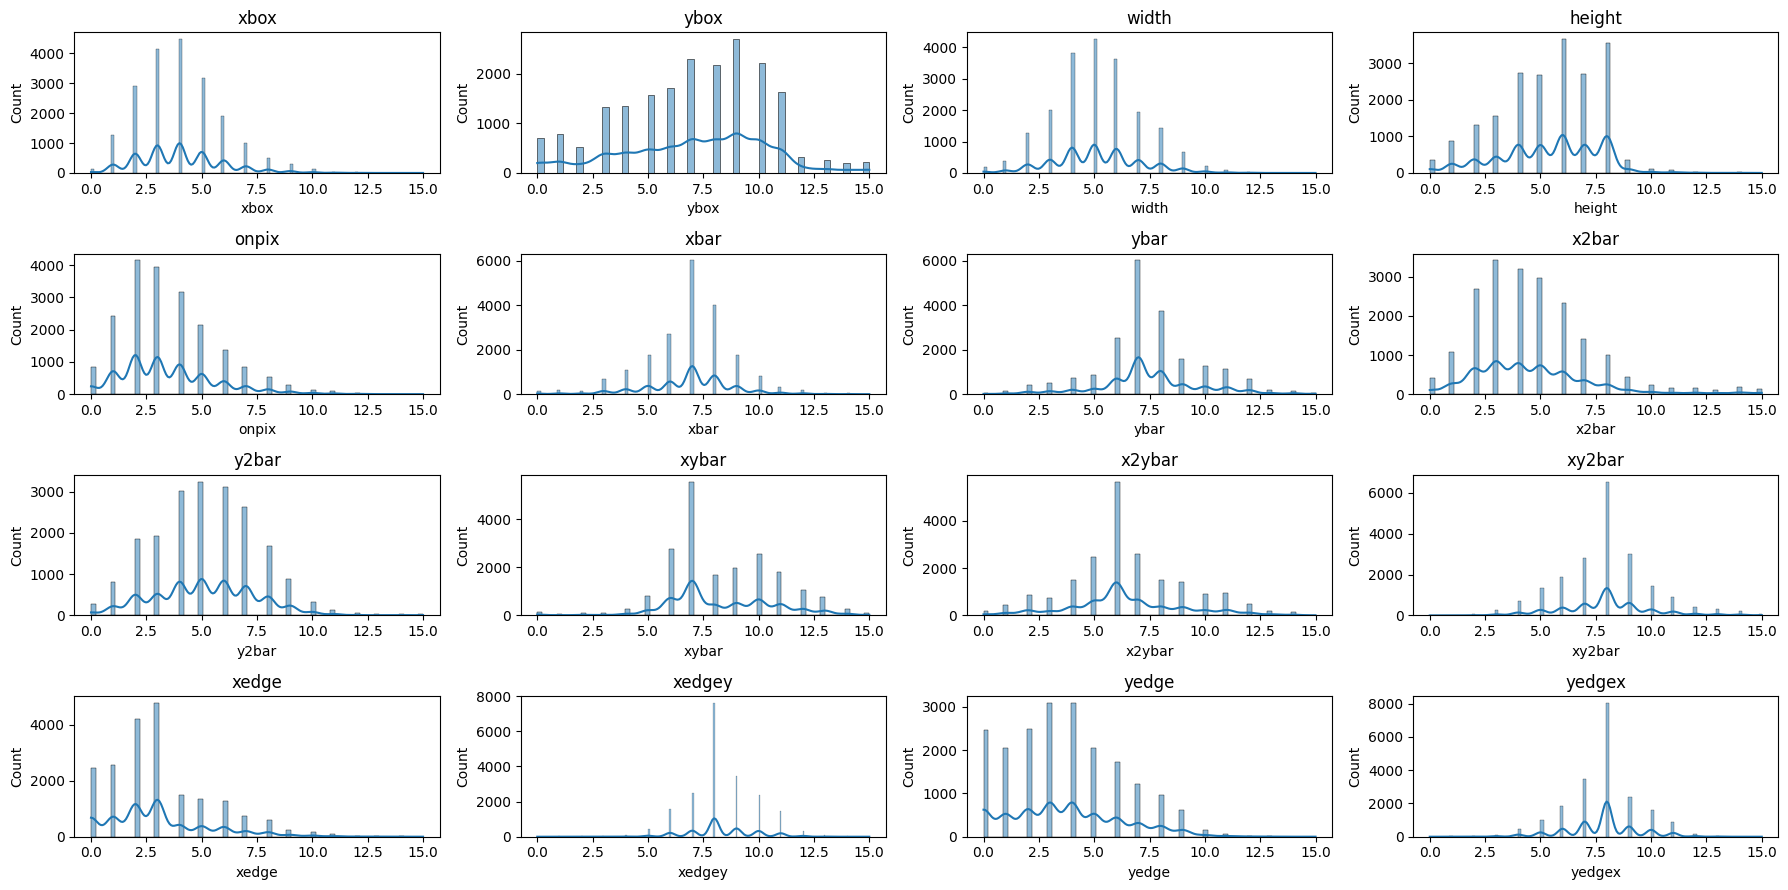

In [155]:
# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(18, 9))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through numerical columns and plot
for i, col in enumerate(data):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

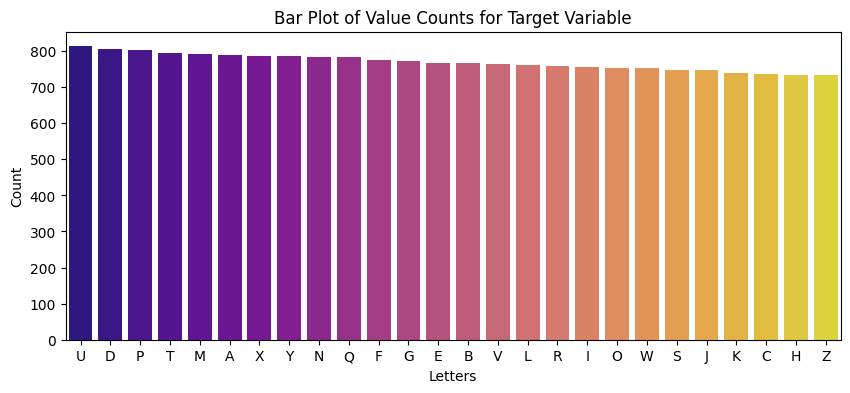

In [156]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df['letter'].value_counts().index, y=df['letter'].value_counts().values, palette='plasma')
plt.xlabel('Letters')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts for Target Variable')
plt.show()

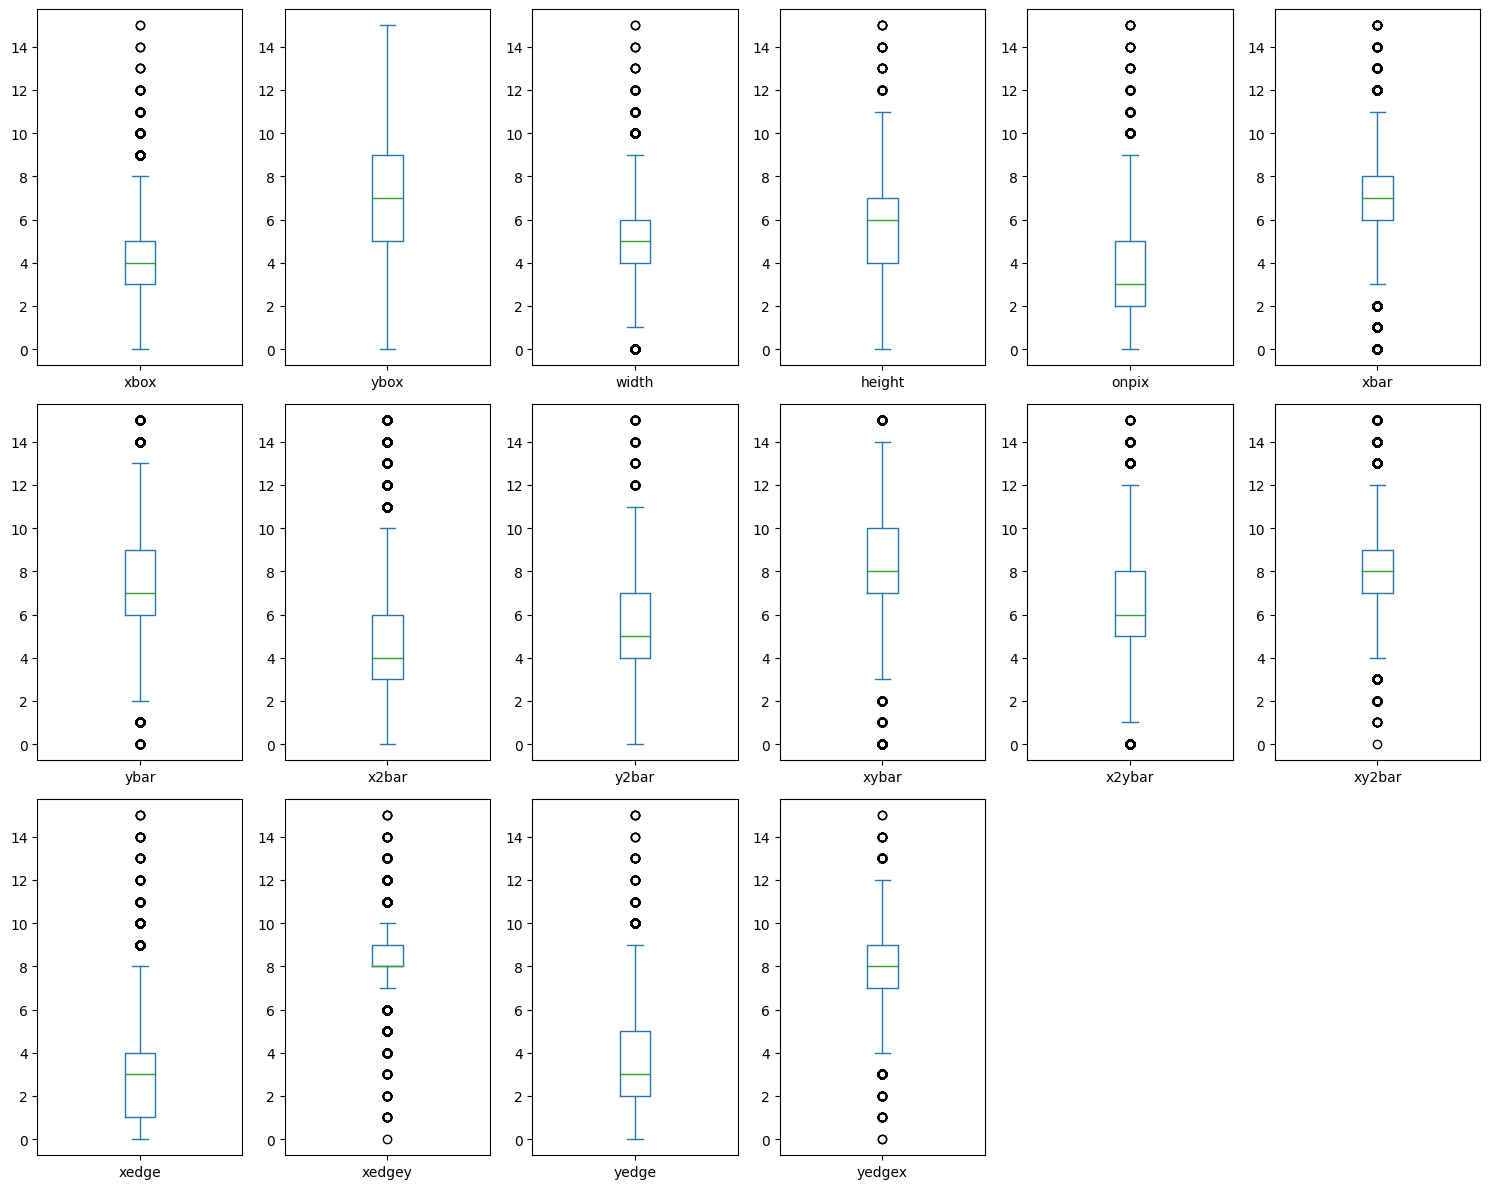

In [157]:
# Box plots
data.plot(kind='box', subplots=True, layout=(3, 6), figsize=(15, 12), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

Each varaiable in the dataset except ybox has outliers.

In [158]:
# Encode labels
label_encoder = LabelEncoder()
df['letter'] = label_encoder.fit_transform(df['letter'])
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


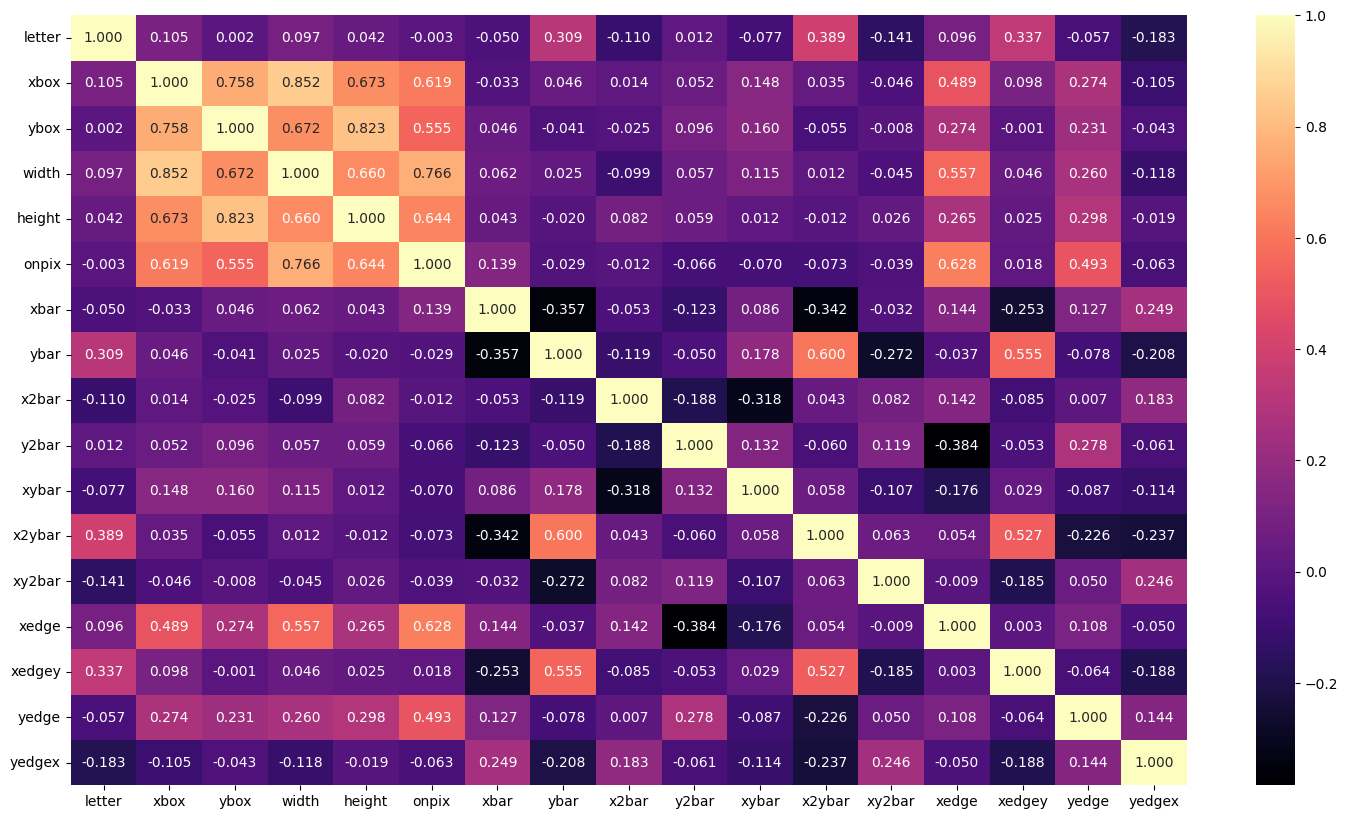

In [159]:
plt.figure(figsize = (18, 10));
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

**Data Normalization**

In [160]:
# Features and target
X = df.drop('letter', axis=1)
y = df['letter']

In [161]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Implementation

In [163]:
# Step 3: Model Implementation
def create_model(hidden_layers=1, neurons=32, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    for _ in range(hidden_layers):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(len(np.unique(y)), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [164]:
# Initialize model
model = create_model()

# Train the model
history_1 = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
500/500 [==============================] - 3s 4ms/step - loss: 1.9940 - accuracy: 0.4390 - val_loss: 1.1864 - val_accuracy: 0.6712
Epoch 2/20
500/500 [==============================] - 2s 3ms/step - loss: 1.0091 - accuracy: 0.7072 - val_loss: 0.8560 - val_accuracy: 0.7508
Epoch 3/20
500/500 [==============================] - 2s 5ms/step - loss: 0.8011 - accuracy: 0.7651 - val_loss: 0.7317 - val_accuracy: 0.7845
Epoch 4/20
500/500 [==============================] - 2s 4ms/step - loss: 0.6937 - accuracy: 0.7969 - val_loss: 0.6421 - val_accuracy: 0.8085
Epoch 5/20
500/500 [==============================] - 1s 3ms/step - loss: 0.6222 - accuracy: 0.8188 - val_loss: 0.5894 - val_accuracy: 0.8273
Epoch 6/20
500/500 [==============================] - 2s 3ms/step - loss: 0.5680 - accuracy: 0.8339 - val_loss: 0.5445 - val_accuracy: 0.8390
Epoch 7/20
500/500 [==============================] - 2s 4ms/step - loss: 0.5257 - accuracy: 0.8458 - val_loss: 0.5125 - val_accuracy: 0.8435
Epoch 

In [165]:
# Get predicted probabilities
y_pred_prob_1 = model.predict(X_test)

# Convert probabilities to class labels
y_pred_1 = np.argmax(y_pred_prob_1, axis=1)

# Calculate accuracy
accuracy_basic = accuracy_score(y_test, y_pred_1)
F1_score_basic = f1_score(y_test, y_pred_1, average='weighted')
precision_basic = precision_score(y_test, y_pred_1, average='weighted')
recall_basic = recall_score(y_test, y_pred_1, average='weighted')
print("Accuracy:", accuracy_basic)
print("F1 Score:", F1_score_basic)
print("Precision:", precision_basic)
print("Recall:", recall_basic)

125/125 [==============================] - 0s 2ms/step
Accuracy: 0.89625
F1 Score: 0.8959819644440942
Precision: 0.8981051591036533
Recall: 0.89625


In [166]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_147 (Dense)           (None, 32)                544       
                                                                 
 dense_148 (Dense)           (None, 32)                1056      
                                                                 
 dense_149 (Dense)           (None, 26)                858       
                                                                 
Total params: 2,458
Trainable params: 2,458
Non-trainable params: 0
_________________________________________________________________


In [167]:
history_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

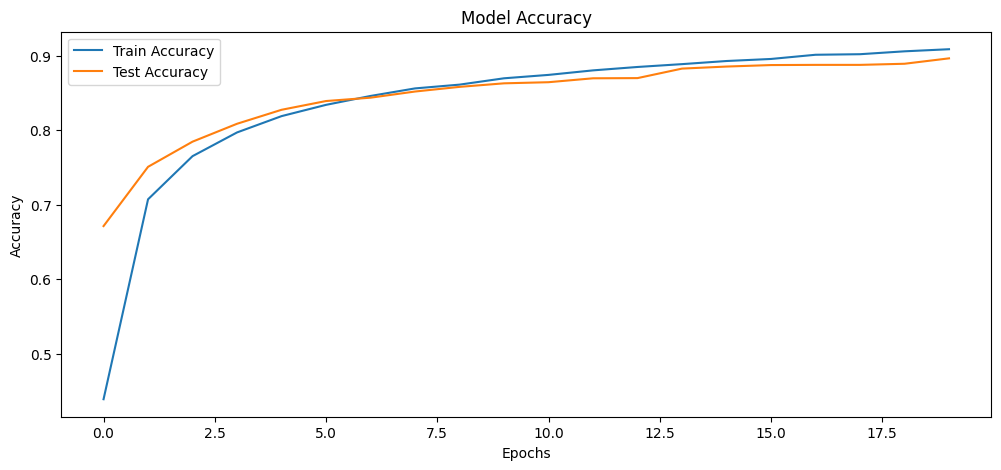

In [168]:
# Plot accuracy
plt.figure(figsize=(12, 5))
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

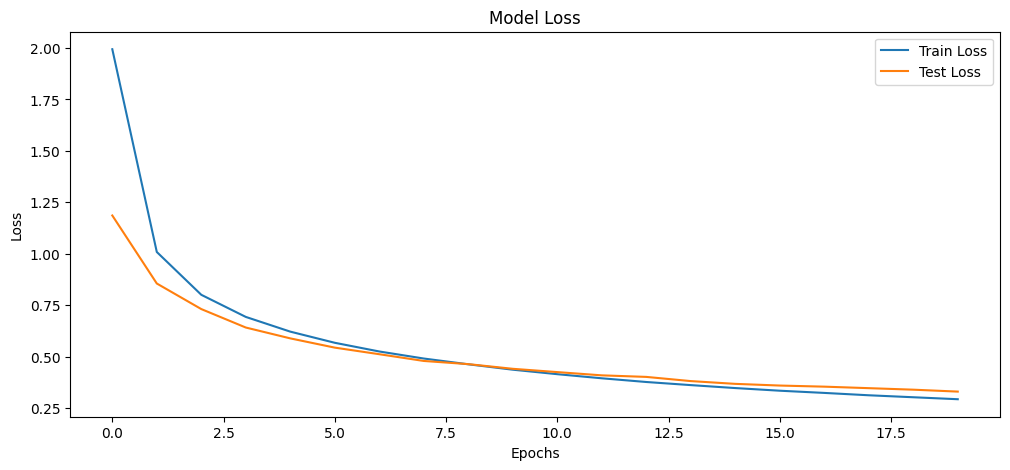

In [169]:
# Subplot for loss
plt.figure(figsize=(12, 5))
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Hyperparameter Tuning

In [137]:
model_2 = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

In [138]:
# Define hyperparameter grid
param_dist = {
    'hidden_layers': [1, 2, 3],
    'neurons': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01, 0.1],
    'epochs': [10, 20, 30],
    'batch_size': [32, 64]
}

In [139]:
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_2, param_distributions=param_dist, n_iter=10, cv=3)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x79dc2560e3b0>,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'batch_size': [32, 64],
                                        'epochs': [10, 20, 30],
                                        'hidden_layers': [1, 2, 3],
                                        'learning_rate': [0.001, 0.01, 0.1],
                                        'neurons': [32, 64, 128]})

In [143]:
# Print the best parameters
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'neurons': 128, 'learning_rate': 0.01, 'hidden_layers': 2, 'epochs': 30, 'batch_size': 64, 'activation': 'relu'}


In [145]:
# Train the model on the training data
best_model = create_model(hidden_layers=best_params['hidden_layers'], neurons=best_params['neurons'], activation=best_params['activation'], learning_rate=best_params['learning_rate'])
history_2 = best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_test, y_test))

Epoch 1/30
250/250 [==============================] - 2s 6ms/step - loss: 1.3328 - accuracy: 0.6342 - val_loss: 0.7128 - val_accuracy: 0.7943
Epoch 2/30
250/250 [==============================] - 1s 5ms/step - loss: 0.5807 - accuracy: 0.8289 - val_loss: 0.4645 - val_accuracy: 0.8635
Epoch 3/30
250/250 [==============================] - 1s 5ms/step - loss: 0.4077 - accuracy: 0.8753 - val_loss: 0.3583 - val_accuracy: 0.8938
Epoch 4/30
250/250 [==============================] - 1s 5ms/step - loss: 0.3108 - accuracy: 0.9049 - val_loss: 0.2882 - val_accuracy: 0.9133
Epoch 5/30
250/250 [==============================] - 1s 5ms/step - loss: 0.2467 - accuracy: 0.9237 - val_loss: 0.2486 - val_accuracy: 0.9220
Epoch 6/30
250/250 [==============================] - 2s 6ms/step - loss: 0.2057 - accuracy: 0.9356 - val_loss: 0.2092 - val_accuracy: 0.9340
Epoch 7/30
250/250 [==============================] - 2s 8ms/step - loss: 0.1789 - accuracy: 0.9414 - val_loss: 0.1982 - val_accuracy: 0.9358
Epoch 

In [146]:
# Get predicted probabilities
y_pred_prob_1 = best_model.predict(X_test)

# Convert probabilities to class labels
y_pred_1 = np.argmax(y_pred_prob_1, axis=1)

# Calculate accuracy
accuracy_basic = accuracy_score(y_test, y_pred_1)
F1_score_basic = f1_score(y_test, y_pred_1, average='weighted')
precision_basic = precision_score(y_test, y_pred_1, average='weighted')
recall_basic = recall_score(y_test, y_pred_1, average='weighted')
print("Accuracy:", accuracy_basic)
print("F1 Score:", F1_score_basic)
print("Precision:", precision_basic)
print("Recall:", recall_basic)

125/125 [==============================] - 1s 6ms/step
Accuracy: 0.96175
F1 Score: 0.9618118392361792
Precision: 0.962749086788579
Recall: 0.96175


In [147]:
best_model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_143 (Dense)           (None, 128)               2176      
                                                                 
 dense_144 (Dense)           (None, 128)               16512     
                                                                 
 dense_145 (Dense)           (None, 128)               16512     
                                                                 
 dense_146 (Dense)           (None, 26)                3354      
                                                                 
Total params: 38,554
Trainable params: 38,554
Non-trainable params: 0
_________________________________________________________________


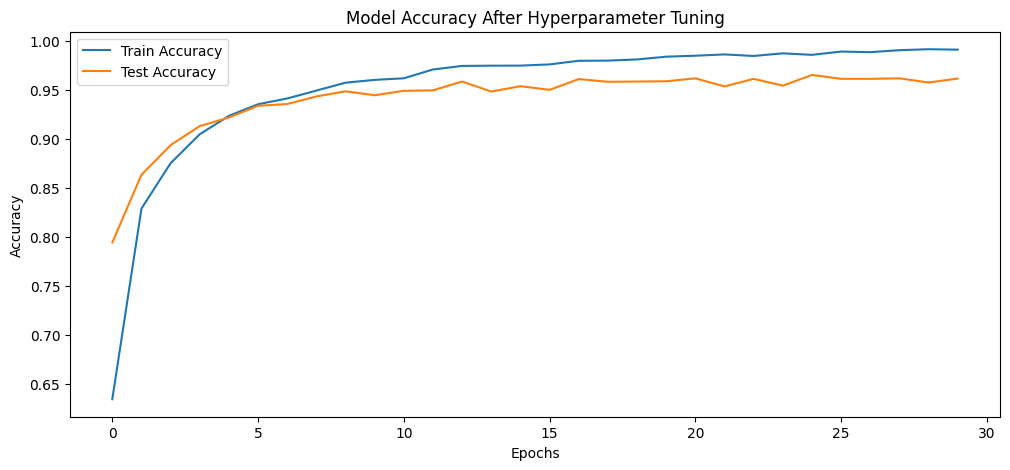

In [148]:
# Plot accuracy
plt.figure(figsize=(12, 5))
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy After Hyperparameter Tuning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

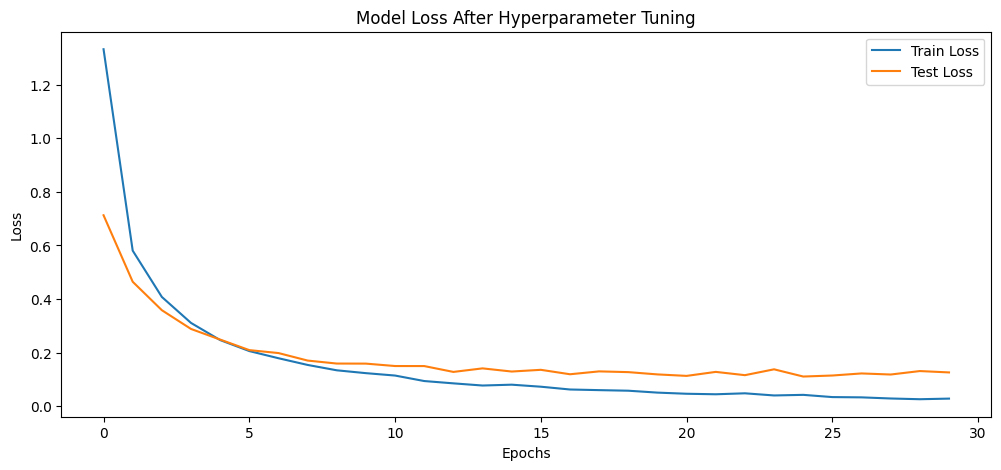

In [149]:
# Subplot for loss
plt.figure(figsize=(12, 5))
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Test Loss')
plt.title('Model Loss After Hyperparameter Tuning')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model Comparison and Results

#### **Summary**

#### Basic Model - ANN
The basic ANN model was configured with:
- **Hidden Layers**: 1
- **Neurons**: 32
- **Activation Function**: ReLU
- **Learning Rate**: 0.001

The model's performance on the validation set was as follows:
- **Accuracy**: 0.8985
- **F1 Score**: 0.8991
- **Precision**: 0.9021
- **Recall**: 0.8985

**Model Architecture:** "sequential_5"



### Tuned Model - ANN
The hyperparameter-tuned ANN model was configured with:
- **Hidden Layers**: 2
- **Neurons**: 128
- **Activation Function**: ReLU
- **Learning Rate**: 0.01
- **Epochs**: 30
- **Batch Size**: 64

The performance after tuning was:
- **Accuracy**: 0.9618
- **F1 Score**: 0.9618
- **Precision**: 0.9627
- **Recall**: 0.9618

**Model Architecture:** "sequential_40"



### Model Comparison

Here is a comparison of the models based on their performance metrics:

| **Model**                   | **Accuracy** | **F1 Score** | **Precision** | **Recall** |
|-----------------------------|--------------|--------------|---------------|------------|
| Basic Model - ANN           | 0.8985       | 0.8991       | 0.9021        | 0.8985     |
| Tuned Model - ANN           | 0.9618       | 0.9618       | 0.9627        | 0.9618     |

### Conclusion

The hyperparameter tuning significantly improved the performance of the ANN model. The accuracy increased from 0.8985 to 0.9618, and the F1 Score, Precision, and Recall also showed noticeable improvements. This indicates that tuning the hyperparameters, including increasing the number of neurons and hidden layers, as well as adjusting the learning rate and other parameters, led to a more robust and accurate model.


